#### Trying out [kaggle](www.kaggle.com)'s [titanic](https://www.kaggle.com/c/titanic) on [`scikit-learn`](http://scikit-learn.org/stable/)'s [`RandomForestClassifier`](http://scikit-learn.org/stable/modules/ensemble.html#random-forests) with the [new missing value support](https://github.com/scikit-learn/scikit-learn/pull/5974)!

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import os

import numpy as np
import pandas as pd

from __future__ import print_function

%matplotlib inline
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.

from subprocess import check_output

dataset_directory_path = "./kaggle_titanic_dataset"

print(check_output(["ls", dataset_directory_path]).decode("utf8"))

genderclassmodel.csv
genderclassmodel.py
gendermodel.csv
gendermodel.py
myfirstforest.py
submission_imp.csv
submission_mv.csv
test.csv
train.csv



In [3]:
# Load the training set into a pandas data frame

train_data_unclean = pd.read_csv(os.path.join(dataset_directory_path, 'train.csv'))
train_data = train_data_unclean.copy()

train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [5]:
# Let's get some stats on numerical features

# Note that the missing data is excluded while computing the mean and std

train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# The 1st 6 rows of Age

train_data.Age[0:6]

0    22
1    38
2    26
3    35
4    35
5   NaN
Name: Age, dtype: float64

In [7]:
# Good! So we have 177 / 891 age entries and  / 891 cabin entries missing

print("The number of passengers with missing age entry:", sum(train_data.Age.isnull()))
print("The number of passengers with missing Cabin entry:", sum(train_data.Cabin.isnull()))

The number of passengers with missing age entry: 177
The number of passengers with missing Cabin entry: 687


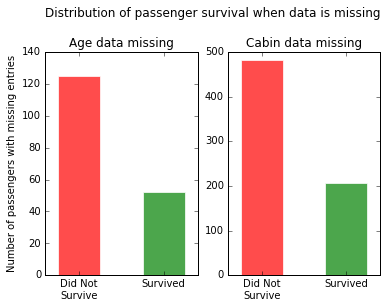

In [8]:
# Now let's see if this missingness in Age/Cabin is correlated with the survival of the passenger

import matplotlib.pyplot as plt

missing_columns = ["Age", "Cabin"]

fig, ax = plt.subplots(1, len(missing_columns))

missing_counts = {}

for i, column in enumerate(missing_columns):
    missing_counts[column] = np.bincount(train_data[train_data[column].isnull()].Survived == 1)
    ax[i].bar([0, 0.1], missing_counts[column], 0.05, color=['r', 'g'], ec='w', alpha=0.7, align='center')
    ax[i].set_xticklabels(["Did Not\nSurvive", "Survived"])
    ax[i].set_xticks([0, 0.1])

    ax[i].set_title("%s data missing" % column)
    

ax[0].set_ylabel("Number of passengers with missing entries")
plt.title("Distribution of passenger survival when data is missing\n\n", loc='right')

plt.show()

The number of passengers with either age OR cabin info unavailable. 706
The number of passengers with both age and cabin info missing. 158 (22%)
The number of passengers with only age info missing. 19 (3%)
The number of passengers with only cabin info missing. 529 (75%)


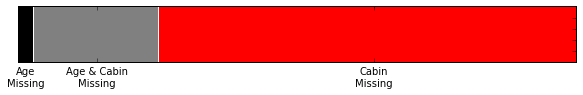

In [9]:
# We'll now see if the subset of passengers whose Cabin info is missing contains the subset of passengers where Age is missing
# (This will help us observe if the missingness is correlated across fields)

cabin_missing = train_data.Cabin.isnull()

age_missing = train_data.Age.isnull()

cabin_and_age_missing = cabin_missing & age_missing

cabin_or_age_missing = cabin_missing | age_missing

cabin_only_missing = cabin_missing & ~age_missing

age_only_missing = age_missing & ~cabin_missing

print("The number of passengers with either age OR cabin info unavailable.",
      cabin_or_age_missing.sum())

print("The number of passengers with both age and cabin info missing.",
      cabin_and_age_missing.sum(),
      "(%d%%)" % np.round(cabin_and_age_missing.sum() * 100. / cabin_or_age_missing.sum()))

print("The number of passengers with only age info missing.",
      age_only_missing.sum(),
      "(%d%%)" % np.round(age_only_missing.sum() * 100. / cabin_or_age_missing.sum()))

print("The number of passengers with only cabin info missing.",
      cabin_only_missing.sum(),
      "(%d%%)" % np.round(cabin_only_missing.sum() * 100. / cabin_or_age_missing.sum()))

fig, ax = plt.subplots()

ax.barh([0, 0, 0], [0.706, 0.177, 0.019], 0.5, ec='w', color=['r', 'grey', 'k'])
ax.set_ylim([0, 0.5])
ax.set_xlim([0, 0.706])
ax.set_yticklabels('')
ax.set_xticks([0.01, 0.1, 0.45])
ax.set_xticklabels(["Age\nMissing", "Age & Cabin\nMissing", "Cabin\nMissing"])

fig.set_size_inches([10, 1])
plt.show()

Most of the passengers having the age information missing also have the Cabin information missing.

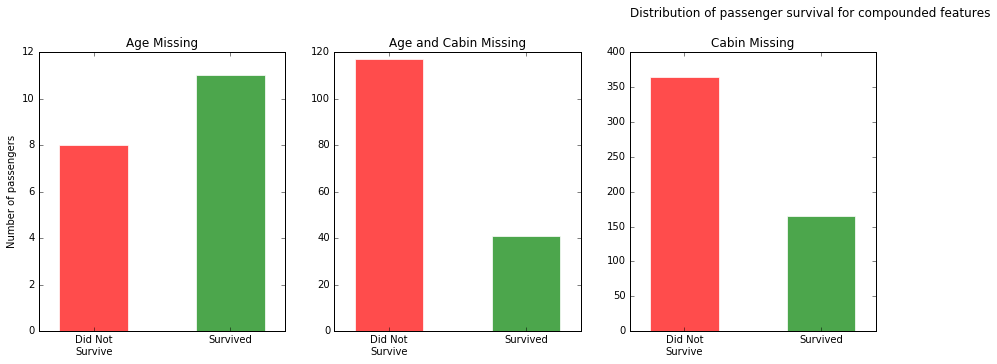

In [10]:
# Now let's look at the correlation between these compound features and the survival

compound_features = ["Age Missing", "Age and Cabin Missing", "Cabin Missing"]
masks = [age_only_missing, cabin_and_age_missing, cabin_only_missing]

fig, ax = plt.subplots(1, 3)

for i, (name, mask) in enumerate(zip(compound_features, masks)):
    missing_counts = np.bincount(train_data[mask].Survived == 1)
    ax[i].bar([0, 0.1], missing_counts, 0.05, color=['r', 'g'], ec='w', alpha=0.7, align='center')
    ax[i].set_xticklabels(["Did Not\nSurvive", "Survived"])
    ax[i].set_xticks([0, 0.1])
    ax[i].set_title(name)
    

ax[0].set_ylabel("Number of passengers")
plt.title("Distribution of passenger survival for compounded features\n\n", loc='left')

fig.set_size_inches([15, 5])
plt.show()

This indicates that when age and cabin are both missing, there is approximately 75% chance that the passenger did not survive.

Also note that when age alone goes missing, it could be because of an error in the paper work or records. It is just random noise and the Random Forest will inherently suppress that.

In [11]:
# Let's clean up the data and add some compounded features
train_data['FamilySize'] = train_data.SibSp + train_data.Parch
# The entries having Age information missing will have this field also missing
train_data['AgeXClass'] = train_data.Age * train_data.Pclass

In [12]:
# Now we'll look at all the dtypes and see if sklearn's RF can be run on it as such
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
FamilySize       int64
AgeXClass      float64
dtype: object

In [13]:
train_data.dtypes[train_data.dtypes.map(lambda x: x=='object')]

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

In [14]:
# Here sex is categorical and can be one-hot encoded, name is not quite relevant
# (thought some have been able to extrapolate correlation between the title in the name and the survival)
# Ticket could be dropped, Embarked is again categorical, we can analyse it and see if we can one-hot/level encode it.
# Cabin has vital informative missingness in entries which we will exploit.

train_data['Sex_binary'] = (train_data.Sex == 'male').astype(int)
train_data = train_data.drop(['Sex', 'Name', 'PassengerId'], axis=1)

# 1 for Male and 0 for Female
# Or if you are a feminist data scientist you could as well give as == 'female' ;)

In [15]:
# Let's look at the entries of Embarked

train_data.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

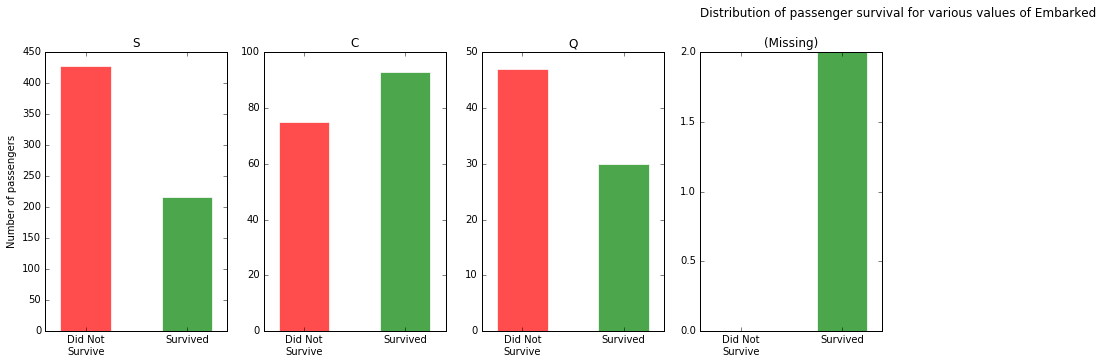

In [16]:
# We can see how the value for this column correlates with the survival

compound_features = ["S", "C", "Q", "(Missing)"]
masks = [train_data.Embarked == "S", train_data.Embarked == "C", train_data.Embarked == "Q", train_data.Embarked.isnull()]

fig, ax = plt.subplots(1, 4)

for i, (name, mask) in enumerate(zip(compound_features, masks)):
    missing_counts = np.bincount(train_data[mask].Survived == 1)
    ax[i].bar([0, 0.1], missing_counts, 0.05, color=['r', 'g'], ec='w', alpha=0.7, align='center')
    ax[i].set_xticklabels(["Did Not\nSurvive", "Survived"])
    ax[i].set_xticks([0, 0.1])
    ax[i].set_title(name)
    

ax[0].set_ylabel("Number of passengers")
plt.title("Distribution of passenger survival for various values of Embarked\n\n", loc='left')

fig.set_size_inches([15, 5])
plt.show()

This shows us when embarked is "S", there is a 2/3 chance that the passenger died. The same for when embarked is "Q". Interestingly when embarked information is missing, in both cases the passenger has survived! (This seems a bit like random noise. But leave it in as such.)

If embarked is S or Q lets assign a new feature to value of 1 and 0 otherwise. Let's leave missing values as such.

In [17]:
train_data['EmbarkedIsQorS'] = ((train_data.Embarked == "S") | (train_data.Embarked == "Q")).astype(int)

In [18]:
# Let's restore the missing values

train_data.EmbarkedIsQorS[train_data.Embarked.isnull()][:] = np.nan

train_data.EmbarkedIsQorS.unique()

array([1, 0])

In [19]:
# Now we'll drop the embarked

train_data = train_data.drop("Embarked", axis=1)

In [20]:
# Before dropping it blindly let's look at the similarities in the first 4 characters in the Tickets

train_data.Ticket = train_data.Ticket.map(lambda x: x.strip()[:4].strip())
len(train_data.Ticket.unique())

278

In [21]:
# Cool! So that managed to bin all the unique tickets into 278 bins. Let's try just the first character

train_data.Ticket = train_data.Ticket.map(lambda x: x.strip()[0].strip())
len(train_data.Ticket.unique())

16

In [22]:
# This is perfect! We have just a small number of ticket bins
train_data.Ticket.unique()

array(['A', 'P', 'S', '1', '3', '2', 'C', '7', 'W', '4', 'F', 'L', '9',
       '6', '5', '8'], dtype=object)

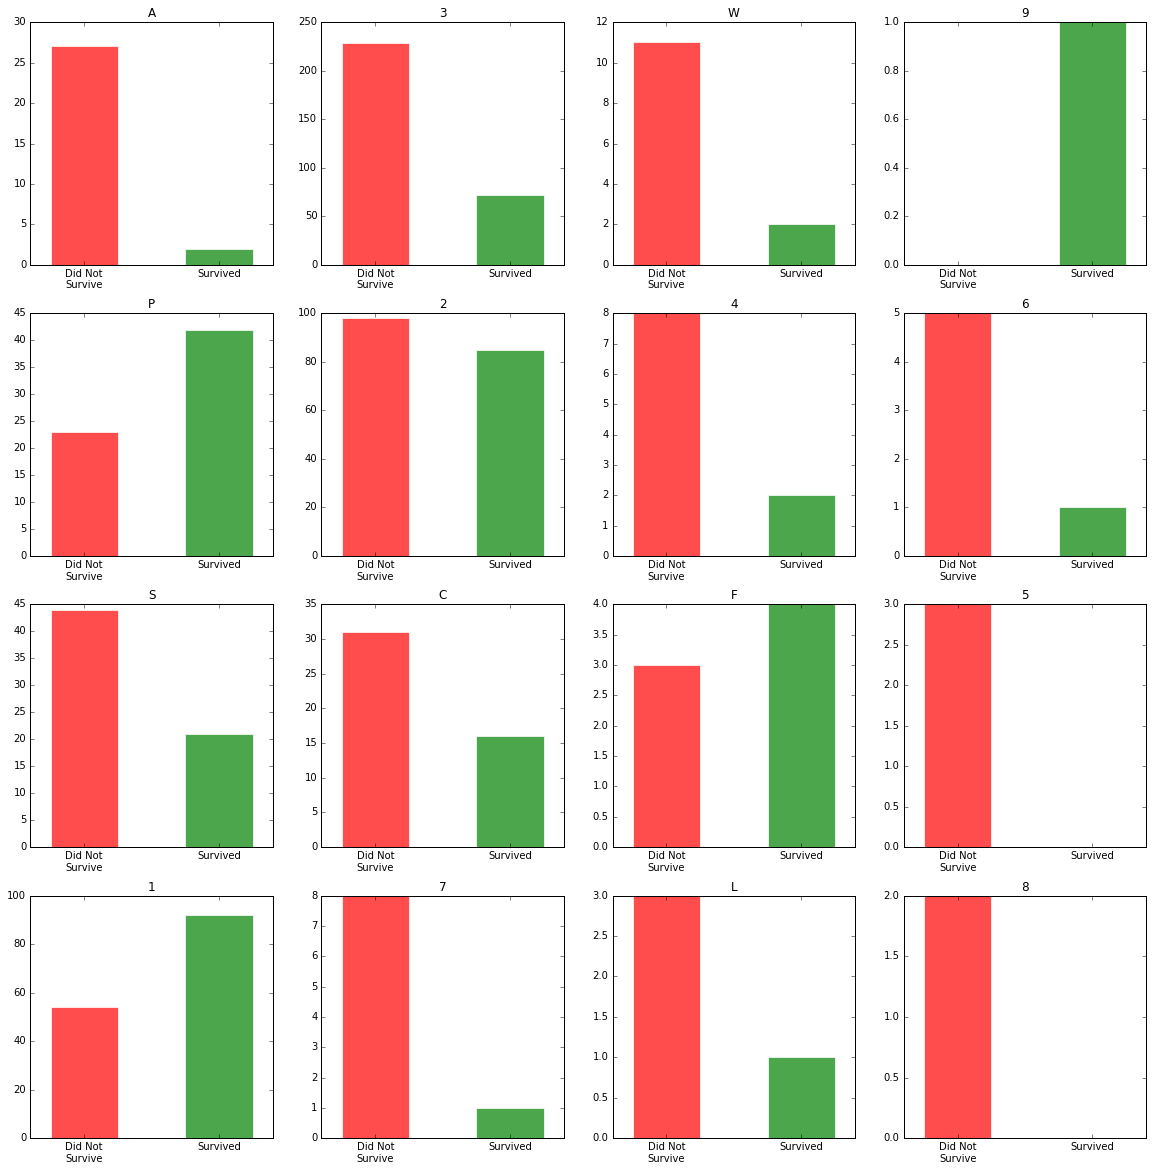

In [23]:
# Let's see if there is a correlation between these ticket categories and survival

# We can see how the value for this column correlates with the survival

fig, ax = plt.subplots(4, 4)

plt.title("Distribution of passenger survival for various values of starting char of the Ticket\n\n")


for i, val in enumerate(train_data.Ticket.unique()):
    missing_counts = np.bincount(train_data[train_data.Ticket == val].Survived == 1,
                                 minlength=2)    
    ax[i%4][i/4].bar([0, 0.1], missing_counts, 0.05, color=['r', 'g'], ec='w', alpha=0.7, align='center')
    ax[i%4][i/4].set_xticklabels(["Did Not\nSurvive", "Survived"])
    ax[i%4][i/4].set_xticks([0, 0.1])
    ax[i%4][i/4].set_title(val)
    
fig.set_size_inches([20, 20])
plt.show()

In [24]:
# There is some really good information and soe random noise too. Let us not throw this feature out and try to salvage it using one-hot encoding.

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

ticket_le = LabelEncoder()
ticket_ohe = OneHotEncoder()

ticket_oh = ticket_ohe.fit_transform(ticket_le.fit_transform(train_data.Ticket).reshape((train_data.shape[0], 1))).toarray()

for i, val in enumerate(ticket_le.classes_):
    train_data['TckStartsWith%s'%val] = ticket_oh[:,i].astype(int)
    
train_data = train_data.drop('Ticket', axis=1)

In [25]:
# Now we have Cabin values alone to clean up

# Cabin has informative missingness and also has some values with multiple spaces.
# We will first eliminate the multi-valued cabins and retain just the first value for simplicity

train_data.Cabin = train_data.Cabin.map(lambda x: np.nan if pd.isnull(x) else x.strip().split(' ')[0].strip())
len(train_data.Cabin.unique())

146

In [26]:
# Let's try to bin them up using the first letter of the cabin

train_data.Cabin = train_data.Cabin.map(lambda x: np.nan if pd.isnull(x) else x[0])
train_data.Cabin.unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

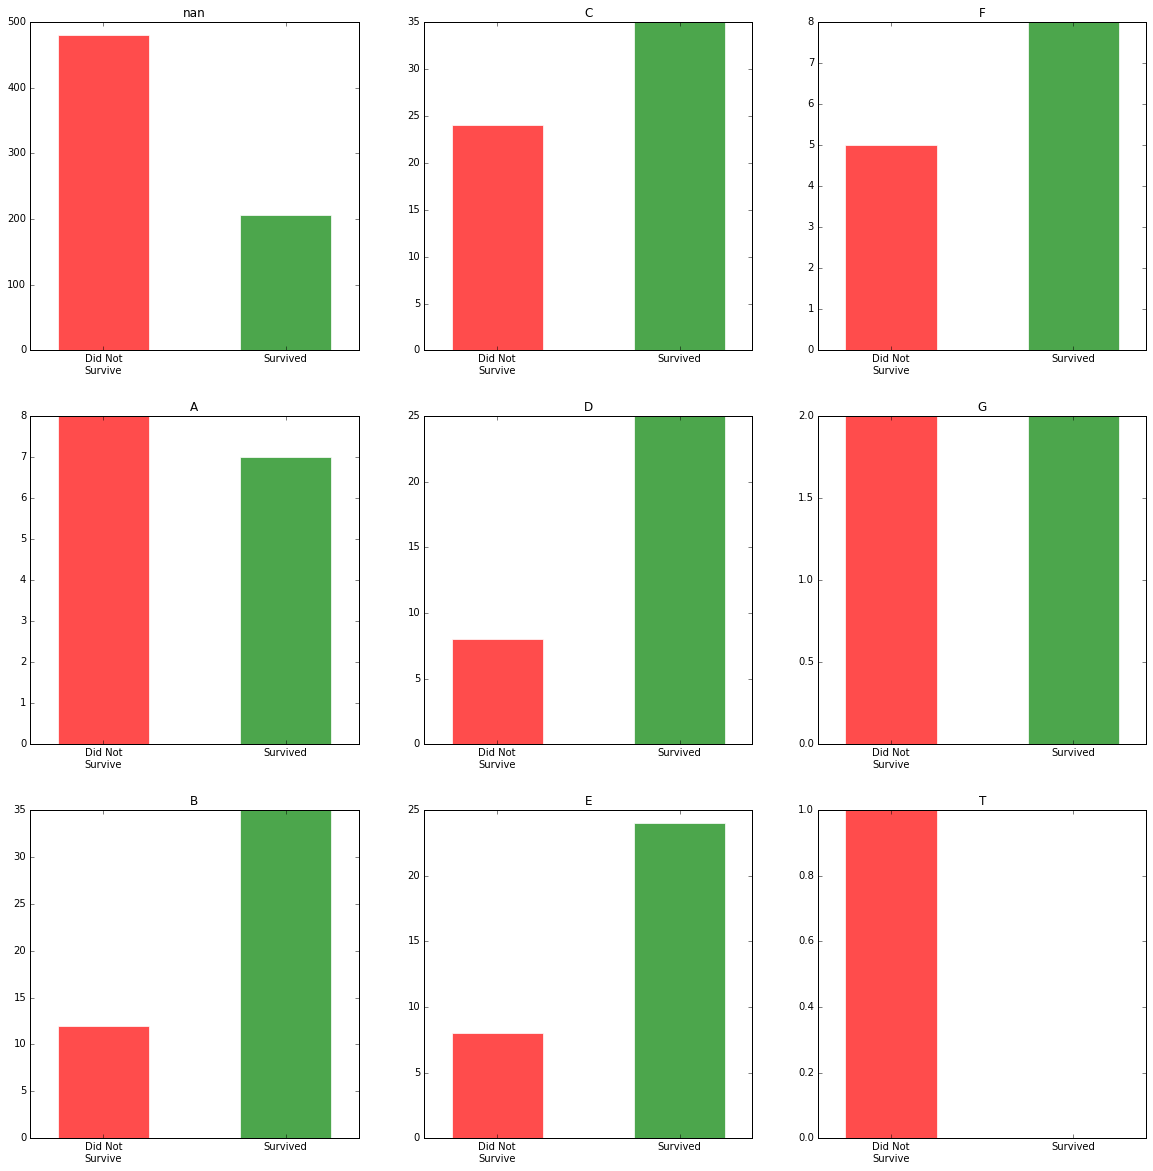

In [27]:
# Let's see if there is a correlation between these ticket categories and survival

# We can see how the value for this column correlates with the survival

fig, ax = plt.subplots(3, 3)

plt.title("Distribution of passenger survival for various values of starting char of the Cabin\n\n")


for i, val in enumerate(sorted(train_data.Cabin.unique())):
    if pd.isnull(val):
        missing_counts = np.bincount(train_data[train_data.Cabin.isnull()].Survived == 1)
    else:
        missing_counts = np.bincount(train_data[train_data.Cabin == val].Survived == 1,
                                     minlength=2)    
    ax[i%3][i/3].bar([0, 0.1], missing_counts, 0.05, color=['r', 'g'], ec='w', alpha=0.7, align='center')
    ax[i%3][i/3].set_xticklabels(["Did Not\nSurvive", "Survived"])
    ax[i%3][i/3].set_xticks([0, 0.1])
    ax[i%3][i/3].set_title(val)
    
fig.set_size_inches([20, 20])
plt.show()

In [28]:
# Let us simply label encode the Cabin starting letters and leave the missing values as such

cabin_le = LabelEncoder()
train_data.Cabin = cabin_le.fit_transform(train_data.Cabin).astype(float)
train_data.Cabin[train_data.Cabin == 0] = np.nan

/tsi/doctorants/raghav/anaconda/anaconda3/envs/python2/lib/python2.7/site-packages/numpy-1.12.0.dev0+59a7b25-py2.7-linux-x86_64.egg/numpy/lib/arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))
/cal/homes/vrajagopalan/.local/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [29]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 27 columns):
Survived          891 non-null int64
Pclass            891 non-null int64
Age               714 non-null float64
SibSp             891 non-null int64
Parch             891 non-null int64
Fare              891 non-null float64
Cabin             204 non-null float64
FamilySize        891 non-null int64
AgeXClass         714 non-null float64
Sex_binary        891 non-null int64
EmbarkedIsQorS    891 non-null int64
TckStartsWith1    891 non-null int64
TckStartsWith2    891 non-null int64
TckStartsWith3    891 non-null int64
TckStartsWith4    891 non-null int64
TckStartsWith5    891 non-null int64
TckStartsWith6    891 non-null int64
TckStartsWith7    891 non-null int64
TckStartsWith8    891 non-null int64
TckStartsWith9    891 non-null int64
TckStartsWithA    891 non-null int64
TckStartsWithC    891 non-null int64
TckStartsWithF    891 non-null int64
TckStartsWithL    891 non-null int64

In [30]:
# Yoohoo! Now we have cleaned up the dataset and have 2 columns with missing data

X, y = train_data.drop('Survived', axis=1).as_matrix(), train_data.Survived.as_matrix()

In [31]:
X.shape, y.shape

((891, 26), (891,))

In [32]:
# Party time! Let's test this data with missing values on our new RF which will now train/predict with missing values

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

cv_scores = cross_val_score(RandomForestClassifier(missing_values="NaN", random_state=42), X, y, cv=10)


print(cv_scores)

print("\nMean cv scores - ", cv_scores.mean())
print("STD cv scores - ", cv_scores.std())

[ 0.76666667  0.76666667  0.7752809   0.80898876  0.86516854  0.82022472
  0.84269663  0.79775281  0.86516854  0.81818182]

Mean cv scores -  0.812679605039
STD cv scores -  0.0351679926163


In [33]:
# Coool. So we'll try using the imputer as we did before to impute these missing values and try running RF on it

from sklearn.preprocessing import Imputer

im = Imputer(strategy="mean", missing_values="NaN")
X_imputed = im.fit_transform(X)

cv_scores = cross_val_score(RandomForestClassifier(missing_values=None, random_state=42), X_imputed, y, cv=10)

print(cv_scores)

print("\nMean cv scores - ", cv_scores.mean())
print("STD cv scores - ", cv_scores.std())

[ 0.75555556  0.78888889  0.75280899  0.82022472  0.83146067  0.84269663
  0.80898876  0.76404494  0.85393258  0.86363636]

Mean cv scores -  0.808223811145
STD cv scores -  0.038991199097


In [34]:
# The ultimate faceoff challenge

# Try the imputer vs implicit missing value handling feature on the test set after cleaning up the test set

from sklearn.pipeline import Pipeline

rf_with_imputer = Pipeline((('imputer', Imputer(strategy="mean", missing_values="NaN")), ('rf', RandomForestClassifier(random_state=42, missing_values=None))))

rf_with_missval = RandomForestClassifier(random_state=42, missing_values="NaN")

rf_with_missval.fit(X, y)
rf_with_imputer.fit(X, y)

test_data_unclean = pd.read_csv(os.path.join(dataset_directory_path, "test.csv"))
test_data = test_data_unclean.copy()

In [35]:
# Let's clean up the data and add some compounded features
test_data['FamilySize'] = test_data.SibSp + test_data.Parch
# The entries having Age information missing will have this field also missing
test_data['AgeXClass'] = test_data.Age * test_data.Pclass

# Convert Sex to binary values
test_data['Sex_binary'] = (test_data.Sex == 'male').astype(int)
test_data = test_data.drop(['Sex', 'Name', 'PassengerId'], axis=1)

# Bin and binary encode Embarked
test_data['EmbarkedIsQorS'] = ((test_data.Embarked == "S") | (test_data.Embarked == "Q")).astype(int)
test_data.EmbarkedIsQorS[test_data.Embarked.isnull()][:] = np.nan
test_data = test_data.drop("Embarked", axis=1)

# OHE the first letter of ticket
test_data.Ticket = test_data.Ticket.map(lambda x: x.strip()[0].strip())
ticket_oh = ticket_ohe.transform(ticket_le.transform(test_data.Ticket).reshape((test_data.shape[0], 1))).toarray()

for i, val in enumerate(ticket_le.classes_):
    test_data['TckStartsWith%s'%val] = ticket_oh[:,i].astype(int)

test_data = test_data.drop('Ticket', axis=1)

# Level encode the cabin data and leave missing values as such
test_data.Cabin = test_data.Cabin.map(lambda x: np.nan if pd.isnull(x) else x.strip().split(' ')[0].strip()[0])
test_data.Cabin = cabin_le.transform(test_data.Cabin).astype(float)
test_data.Cabin[test_data.Cabin == 0] = np.nan

/tsi/doctorants/raghav/anaconda/anaconda3/envs/python2/lib/python2.7/site-packages/numpy-1.12.0.dev0+59a7b25-py2.7-linux-x86_64.egg/numpy/lib/arraysetops.py:259: FutureWarning: numpy equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  return aux[:-1][aux[1:] == aux[:-1]]
/cal/homes/vrajagopalan/.local/lib/python2.7/site-packages/ipykernel/__main__.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [36]:
X_test = test_data.as_matrix()

prediction_missing_vals = rf_with_missval.predict(X_test)
prediction_missing_vals

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [37]:
prediction_impute = rf_with_imputer.predict(X_test)
prediction_impute

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0,

In [38]:
# This got me a score of 0.72727
with open(os.path.join(dataset_directory_path, 'submission_mv.csv'), 'w') as sf:
    sf.write("PassengerId,Survived\n")
    for i, p in enumerate(prediction_missing_vals):
        sf.write('%d,%d\n' % (892 + i, p))
        
# This got me a score of 0.70335
with open(os.path.join(dataset_directory_path, 'submission_imp.csv'), 'w') as sf:
    sf.write("PassengerId,Survived\n")
    for i, p in enumerate(prediction_impute):
        sf.write('%d,%d\n' % (892 + i, p))